In this notebook, we will implement the Perceptron using the Iris dataset

In [229]:
 ### Import packages

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [230]:
### Import datasets from sklearn.datasets
data = load_iris()
data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [231]:
#### Target 

target = data.target

In [232]:
### Count the number of uniques values

N_= np.unique(target, return_counts=True)

In [233]:
print('the unique values in the targets are', N_)

the unique values in the targets are (array([0, 1, 2]), array([50, 50, 50]))


In [234]:
target.shape

(150,)

In [235]:
type(target)

numpy.ndarray

## Remove the class 2 in our dataset in order to have a binary classification problem

In [236]:
#### Transforms target to binary classification problem
## your code
y = np.delete(target, np.where(target == 2 ))

In [237]:
y.shape

(100,)

## Replace all 0 in the target by -1 using numpy

In [238]:
###using np.where
y = np.where(y==0,-1, 1)

In [239]:
y

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

## Get the input data

In [240]:
### Inputs values
Inputs = data.data

In [241]:
Inputs.shape

(150, 4)

## for simplicity let's keep only two features (columns) (`sepal width` and  `petal width`)

In [242]:
Inputs = np.hstack([Inputs[:, 1].reshape(-1, 1), Inputs[:, 3].reshape(-1, 1)])

In [243]:
Inputs[0]

array([3.5, 0.2])

## Let's remove the last 50 rows in the inputs data (they belong to the class 2)

In [244]:
#### New Inputs

X = Inputs[:100,:]

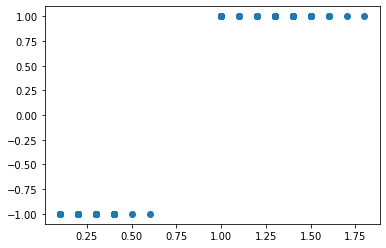

In [245]:
plt.scatter(X[:, 1], y)

In [246]:
X.shape

(100, 2)

## Combines the dataset and Shuffle them using numpy

In [247]:
### Combines the dataset and Shuffle them

dataset = np.hstack((X,y.reshape(-1,1)))


In [248]:
dataset[0]

array([ 3.5,  0.2, -1. ])

In [249]:
n,_=dataset.shape

In [250]:
#### Shuffle the dataset and split
perm_index = np.random.permutation(n)

dataset_ = dataset[perm_index]

p = 0.8

index = int(p*n)

x = dataset_[:,:-1]
y = dataset_[:,-1]

X_train, Y_train = x[:index], y[:index]
X_test, Y_test = x[index:], y[index:]

In [251]:
print(X_train.shape)

(80, 2)


In [252]:
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(80,)
(20, 2)
(20,)


In the next part, we will define two(02) train functions, a function predict and a function accuracy

1. The first function 'train' trains the algorithm for a certain number of epochs. This function takes as inputs X and y and returns the weights

2. The second function 'train_' trains the algorithm until this condition is not satisfy:

$$||w_{new} - w_{old}||_2^2< \epsilon$$

This function takes as inputs X and y and returns the weights

3. The function 'predict' takes as input X and return the prediction
$$y_{pred} =  X \theta$$

After that, we have to replace all values of $y_{pred}< 0$ by -1 else 1.

4. The function 'accuracy' takes as inputs X and Y and returns the accuracy of the model which shows how good is your model.
Here we compare the prediction and the true value and we take the average.

To update the parameters, we have to check if:
$$w_{new} = w_{old} + \alpha \times x^T(y - y_{pred})$$

In [253]:
def update_parameters(theta, alpha, x, y, yhat):
  return theta + alpha*x.T@(y-yhat)

In [254]:
class perceptron:
    
    eps = 1e-5
    def __init__(self,theta,iter_= 2):
        self.iter_ = iter_
        self.theta = theta
        self.learning_rate = 0.01
        
        
    def train(self, X, y):
        n,_= X.shape
        ## your code here
        for i in range(self.iter_):
          yhat = self.predict(X)
          self.theta = update_parameters(self.theta, self.learning_rate, X, y, yhat)
        return self.theta
        
                    
    def train_(self, X, y):
        n,_= X.shape
        while True:
          self.theta1 = self.theta
          ## add your code here
          yhat = self.predict(X)
          self.theta = update_parameters(self.theta1, self.learning_rate, X, y, yhat) 
          if np.linalg.norm(self.theta1-self.theta)<self.__class__.eps:
            break
        return self.theta  
    
    def predict(self,X):
      pred = X@self.theta
      return np.where(pred>0, 1, -1)
    
    def accuracy(self,X,Y):
      ypred = self.predict(X)
      result = np.mean(ypred==Y)
      return  result*100

            

## Instanciate a new perceptron model and train it using the 'train' function

In [255]:
theta = np.random.rand(2)*1e-4
perc = perceptron(theta)

In [256]:
perc.theta

array([8.80687919e-05, 6.78801183e-05])

In [257]:
perc.train(X_train, Y_train)

array([-0.54791193,  0.85606788])

In [258]:
perc.theta

array([-0.54791193,  0.85606788])

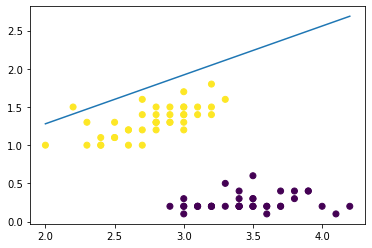

In [259]:
slope = - perc.theta[0]/perc.theta[1]
min = np.amin(X_train[:, 0])
max = np.amax(X_train[:, 0])

x1 = [min, max]
x2 = [slope*min , slope*max]
plt.scatter(X_train[:,0], X_train[:, 1], marker="o", c=Y_train)
plt.plot(x1, x2)

In [260]:
perc.accuracy(X_test, Y_test)

50.0

Instanciate a new perceptron and train it using the 'train_' function

In [261]:
theta = np.random.rand(2)*1e-4
perc = perceptron(theta)

In [262]:
perc.theta

array([8.21055728e-05, 8.02547615e-05])

In [263]:
perc.train_(X_train, Y_train)

array([-0.89391789,  5.17208025])

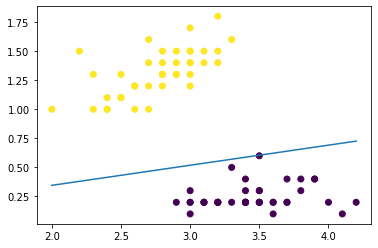

In [264]:
slope = - perc.theta[0]/perc.theta[1]
min = np.amin(X_train[:, 0])
max = np.amax(X_train[:, 0])

x1 = [min, max]
x2 = [slope*min , slope*max]
plt.scatter(X_train[:,0], X_train[:, 1], marker="o", c=Y_train)
plt.plot(x1, x2)

## let's evaluate the model on the training data

In [265]:
perc.predict(X_test)

array([-1,  1, -1, -1,  1, -1,  1,  1, -1,  1,  1, -1, -1,  1, -1, -1,  1,
       -1,  1,  1])

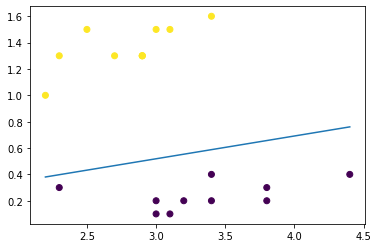

In [266]:
slope = - perc.theta[0]/perc.theta[1]
min = np.amin(X_test[:, 0])
max = np.amax(X_test[:, 0])


x1 = [min, max]
x2 = [slope*min , slope*max]
plt.scatter(X_test[:,0], X_test[:, 1], marker="o", c=Y_test)
plt.plot(x1, x2)

In [267]:
perc.accuracy(X_test, Y_test)

100.0